# <font color='red'>Data Science:</font> <font color='blue'>Primeiros Passos</font>

## 01. Dados e visualizações

In [1]:
import pandas as pd
import matplotlib
import os
import matplotlib.pyplot as plt
import seaborn as sns

notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
notas.shape

(100836, 4)

In [3]:
notas.columns = ['usuarioId', "filmeId", "nota", "momento"]

In [4]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [5]:
notas['nota'].head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

In [6]:
print("Media",notas['nota'].mean())
print("Mediana",notas['nota'].median())

Media 3.501556983616962
Mediana 3.5


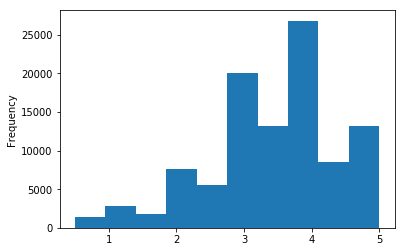

In [7]:
notas.nota.plot(kind='hist')

In [8]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

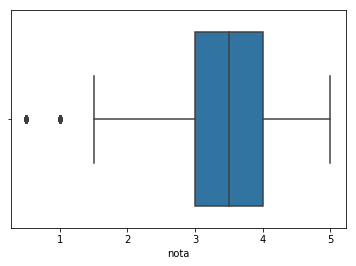

In [9]:
sns.boxplot(notas.nota)

# 02. Análise Exploratória

# Olhando os filmes

In [10]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmesId", "titulo", "generos"]
filmes.head()


,filmesId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando algumas notas específicas por filme 

In [11]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [13]:
notas.query("filmeId==2").nota.mean()


3.4318181818181817

In [14]:
medias_por_filme = notas.groupby("filmeId").mean()["nota"]
# tambem poderia usar o '.nota' no final

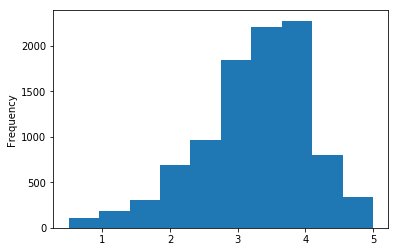

In [15]:
medias_por_filme.plot(kind='hist')

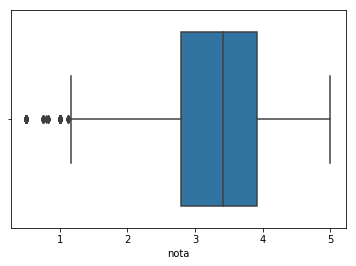

In [16]:
sns.boxplot(medias_por_filme)

In [17]:
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [18]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

C:\Users\mcout\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


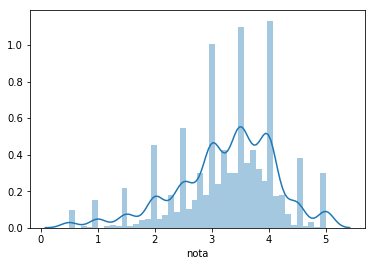

In [19]:
sns.distplot(medias_por_filme)

Text(0.5,1,'Histograma das Médias dos Filmes')

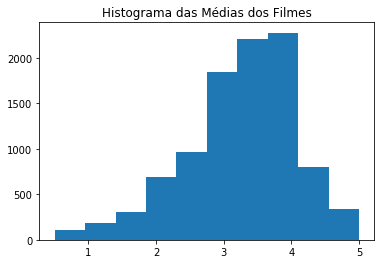

In [20]:
plt.hist(medias_por_filme)
plt.title("Histograma das Médias dos Filmes")

# 03. Variáveis

In [21]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# Diferenca entre variaveis ordinais, nominais e quantitativa

In [22]:
tmdb.original_language.unique() # categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [23]:
# primeiro grau
# segundo grau 
# terceiro grau
# 1 grau < 2 grau < 3 grau => exemplo de categoria ordinal

In [24]:
# budget => orcamento => quantativa continuo

In [25]:
# quantidade de votos => 1,2,3,4, nao tem, 2.5 votos
# notas do movielens => 0.5,1.0,1.5,...,5.0 nao tem 2.7

# 04. Visualização dos dados

In [26]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language","total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


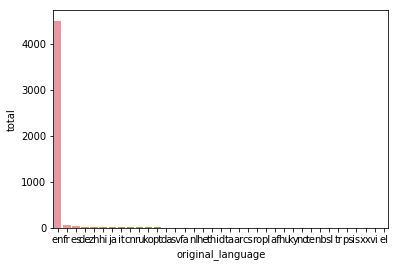

In [27]:
sns.barplot(x="original_language",y="total",data = contagem_de_lingua)

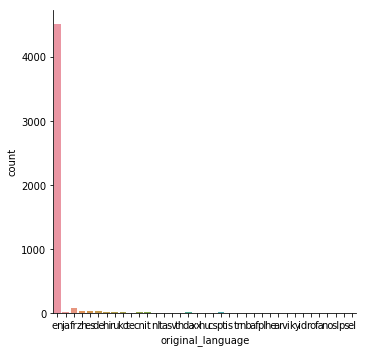

In [28]:
sns.catplot(x = "original_language", kind="count", data=tmdb)

In [29]:
!pip install seaborn==0.9.0

import seaborn as sns

print(sns.__version__)

0.9.0


You should consider upgrading via the 'c:\users\mcout\anaconda3\python.exe -m pip install --upgrade pip' command.


([<matplotlib.patches.Wedge at 0x288dc2a1438>,
 [Text(-1.07917,0.213055,'en'),
  Text(1.03554,-0.371034,'fr'),
  Text(1.05797,-0.301172,'es'),
  Text(1.0688,-0.260129,'de'),
  Text(1.07732,-0.222224,'zh'),
  Text(1.08352,-0.189714,'hi'),
  Text(1.08758,-0.164861,'ja'),
  Text(1.0906,-0.14349,'it'),
  Text(1.09288,-0.124923,'cn'),
  Text(1.09464,-0.108468,'ru'),
  Text(1.09609,-0.0927053,'ko'),
  Text(1.09721,-0.078359,'pt'),
  Text(1.09797,-0.0668722,'da'),
  Text(1.09846,-0.0582522,'sv'),
  Text(1.09878,-0.0517848,'fa'),
  Text(1.09904,-0.0460345,'nl'),
  Text(1.09924,-0.041002,'he'),
  Text(1.09939,-0.0366877,'th'),
  Text(1.0995,-0.033092,'id'),
  Text(1.09958,-0.0302152,'ta'),
  Text(1.09966,-0.0273382,'ar'),
  Text(1.09973,-0.024461,'cs'),
  Text(1.09979,-0.0215836,'ro'),
  Text(1.09983,-0.0194255,'pl'),
  Text(1.09985,-0.0179867,'af'),
  Text(1.09988,-0.0165479,'hu'),
  Text(1.0999,-0.015109,'ky'),
  Text(1.09992,-0.0136702,'no'),
  Text(1.09993,-0.0122313,'te'),
  Text(1.09995,-

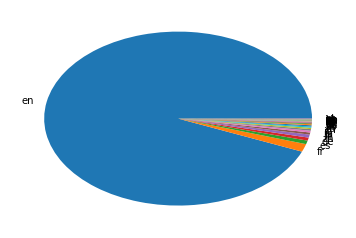

In [30]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

# 05. Continuando com visualização de dados

In [31]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [32]:
dados = {
    'lingua':['ingles','outros'],
    'total':[total_de_ingles,total_do_resto]          
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [33]:
pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


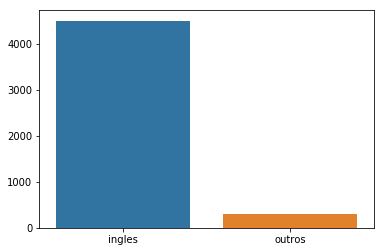

In [34]:
sns.barplot(x='lingua',y='total',data=dados)

([<matplotlib.patches.Wedge at 0x288dc392a90>,
 [Text(-1.07917,0.213055,'4505'), Text(1.07917,-0.213056,'298')])

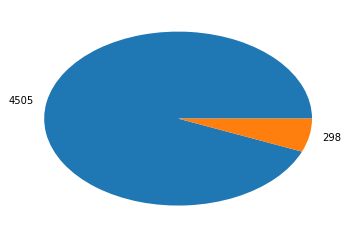

In [35]:
plt.pie(dados['total'],labels=dados['total'])

([<matplotlib.patches.Wedge at 0x288dc3ce908>,
 [Text(-1.07917,0.213055,'ingles'), Text(1.07917,-0.213056,'outros')])

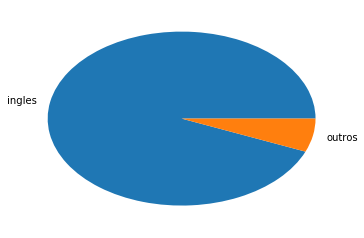

In [36]:
plt.pie(dados['total'],labels=dados['lingua'])

In [37]:
total_por_lingua_de_outros_filmes=tmdb.query("original_language != 'en'").original_language.value_counts()


In [38]:
filmes_sem_lingua_original_em_ingles=tmdb.query("original_language != 'en'")
plt.figure(figsize=(5,10))

<Figure size 360x720 with 0 Axes>

<Figure size 360x720 with 0 Axes>

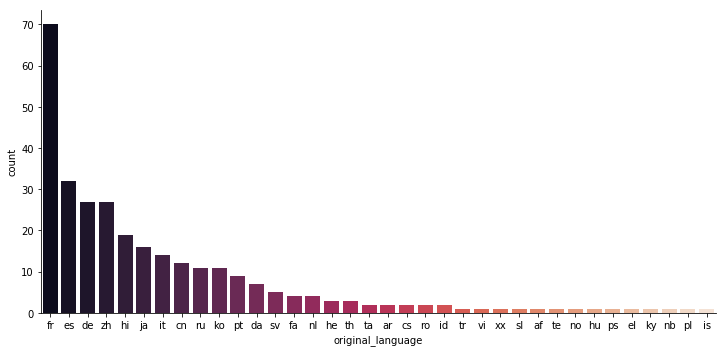

In [39]:
sns.catplot(x = "original_language", kind="count", data=filmes_sem_lingua_original_em_ingles,
            aspect=2,
            palette='rocket',
            order=total_por_lingua_de_outros_filmes.index)

In [40]:
lista = pd.read_csv('movies.csv')
# exemplo de transformação direta em dataframe por meio da função read do pandas

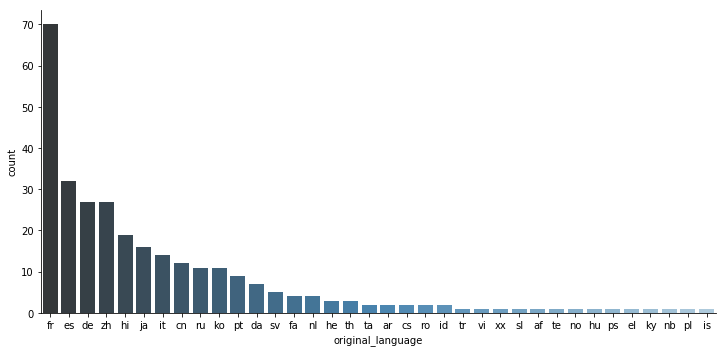

In [41]:
sns.catplot(x = "original_language", kind="count", data=filmes_sem_lingua_original_em_ingles,
            aspect=2,
            palette='Blues_d',
            order=total_por_lingua_de_outros_filmes.index)

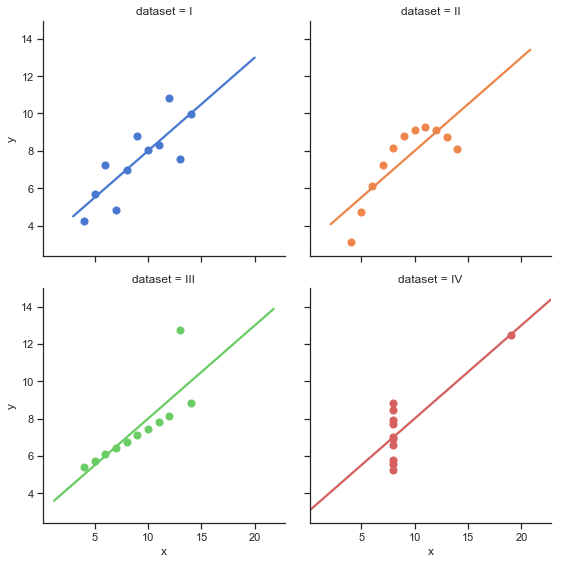

In [42]:
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# 06. Dados e estatística

In [43]:
filmes.head(2)

,filmesId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [44]:
notas_do_toy_story = notas.query("filmeId==1")

In [45]:
notas_do_jumanji = notas.query("filmeId==2")

In [46]:
print(len(notas_do_toy_story),len(notas_do_jumanji))

215 110


In [47]:
print("Nota média do Toy Story = %.2f " % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji = %.2f " % notas_do_jumanji.nota.mean())

Nota média do Toy Story = 3.92 
Nota média do Jumanji = 3.43 


In [48]:
print("Mediana do Toy Story = %.2f " % notas_do_toy_story.nota.median())
print("Mediana do Jumanji = %.2f " % notas_do_jumanji.nota.median())

Mediana do Toy Story = 4.00 
Mediana do Jumanji = 3.50 


In [49]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10),np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10),np.array([1] * 10))

In [50]:
filme1

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5,
       3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

In [51]:
filme2

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [52]:
filme1.mean()

3.0

In [53]:
filme2.mean()

3.0

In [54]:
np.median(filme1)

3.0

In [55]:
np.median(filme2)

3.0

C:\Users\mcout\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


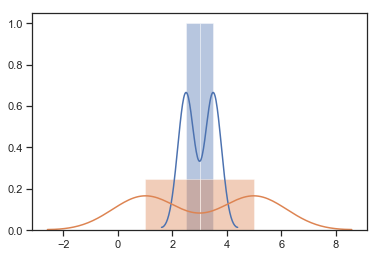

In [56]:
sns.distplot(filme1)
sns.distplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

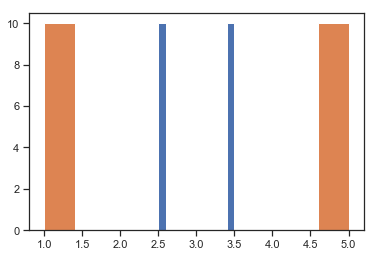

In [57]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x288dcc054a8>,
 'caps': [<matplotlib.lines.Line2D at 0x288dcc05eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x288dcc05320>,
 'medians': [<matplotlib.lines.Line2D at 0x288dcc0f828>,
 'fliers': [<matplotlib.lines.Line2D at 0x288dcc0fcc0>,
 'means': []}

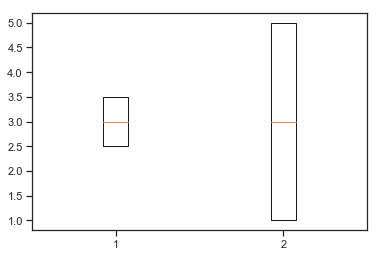

In [58]:
plt.boxplot([filme1,filme2])

C:\Users\mcout\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'whiskers': [<matplotlib.lines.Line2D at 0x288dcc794e0>,
 'caps': [<matplotlib.lines.Line2D at 0x288dcc79eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x288dcc79320>,
 'medians': [<matplotlib.lines.Line2D at 0x288ddeb4828>,
 'fliers': [<matplotlib.lines.Line2D at 0x288ddeb4cc0>,
 'means': []}

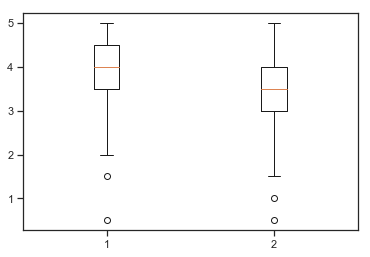

In [59]:
plt.boxplot([notas_do_toy_story.nota,notas_do_jumanji.nota])

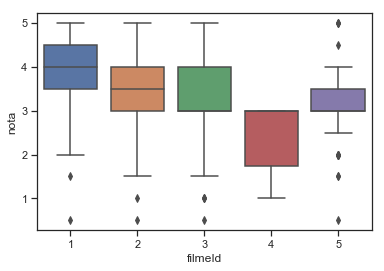

In [60]:
sns.boxplot(x='filmeId',y='nota',data=notas.query("filmeId in [1,2,3,4,5]"))

In [92]:
print('Desvio padrao das notas do Toy Story e %.2f' % notas_do_toy_story.nota.std())
print('Desvio padrao das notas do Jumanji e %.2f' % notas_do_jumanji.nota.std())
# Compração d amédia com desvio padrão
print("Comparação entre medias e desvios padroes de seus respectivos filmes:")
print("Comparacao do Toy Story: %.2f " % notas_do_toy_story.nota.mean(), "%.2f" % notas_do_toy_story.nota.std())
print("Comparacao do Jumanji: %.2f" % notas_do_jumanji.nota.mean(), "%.2f" % notas_do_jumanji.nota.std())
print("Comparacao do filme 1 hipotetico:", filme1.mean(),filme1.std())
print("Comparacao do filme 2 hipotetico:", filme2.mean(),filme2.std())
# Podemos concluir que os dados do filme 2 estão muito mais dispersos, pois o desviuo padrão é muito maior

Desvio padrao das notas do Toy Story e 0.83
Desvio padrao das notas do Jumanji e 0.88
Comparação entre medias e desvios padroes de seus respectivos filmes:
Comparacao do Toy Story: 3.92  0.83
Comparacao do Jumanji: 3.43 0.88
Comparacao do filme 1 hipotetico: 3.0 0.5
Comparacao do filme 2 hipotetico: 3.0 2.0
